In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import pickle
from sklearn.metrics import classification_report

In [8]:
# Importing the test dataset

file =open("PCA_test_data/test.pickle",'rb')
x_test = pickle.load(file)
y_test = pickle.load(file)

In [9]:
# load model

file = open("PCA_Model/Model.pickle",'rb')
classifier = pickle.load(file)

In [4]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)

In [5]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


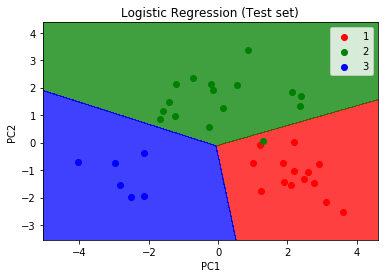

In [6]:
# Visualising the Test set results

X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [7]:
# Visualising the classification report

print("\n",classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36

